In [1]:
import os 
import numpy as np 
import scipy.stats as ss
import nibabel as nib 
import hcp_utils as hcp 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import nilearn.plotting as nplt
import seaborn as sns 
import seaborn.objects as so 
from tqdm.notebook import tqdm

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
dir_rgba = r'/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data/retest'

rgba_mv_s1 = np.load(os.path.join(dir_rgba, 'rgba_mv_s1.npy'))
rgba_mv_s2 = np.load(os.path.join(dir_rgba, 'rgba_mv_s2.npy'))
rgba_rs_s1 = np.load(os.path.join(dir_rgba, 'rgba_rs_s1.npy'))
rgba_rs_s2 = np.load(os.path.join(dir_rgba, 'rgba_rs_s2.npy'))
rgba_3t_s1 = np.load(os.path.join(dir_rgba, 'rgba_3t_s1.npy'))
rgba_3t_s2 = np.load(os.path.join(dir_rgba, 'rgba_3t_s2.npy'))

In [3]:
import v_model_hsv as vmod 

th_ind_mv_s1, rd_ind_mv_s1, th_grp_mv_s1, rd_grp_mv_s1, color_mv_s1 = vmod.v_hsv_model_rgba_indiv(rgba_mv_s1)
th_ind_mv_s2, rd_ind_mv_s2, th_grp_mv_s2, rd_grp_mv_s2, color_mv_s2 = vmod.v_hsv_model_rgba_indiv(rgba_mv_s2)
th_ind_rs_s1, rd_ind_rs_s1, th_grp_rs_s1, rd_grp_rs_s1, color_rs_s1 = vmod.v_hsv_model_rgba_indiv(rgba_rs_s1)
th_ind_rs_s2, rd_ind_rs_s2, th_grp_rs_s2, rd_grp_rs_s2, color_rs_s2 = vmod.v_hsv_model_rgba_indiv(rgba_rs_s2)
th_ind_3t_s1, rd_ind_3t_s1, th_grp_3t_s1, rd_grp_3t_s1, color_3t_s1 = vmod.v_hsv_model_rgba_indiv(rgba_3t_s1)
th_ind_3t_s2, rd_ind_3t_s2, th_grp_3t_s2, rd_grp_3t_s2, color_3t_s2 = vmod.v_hsv_model_rgba_indiv(rgba_3t_s2)

In [4]:
dir_cor = r'/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data/correlation'
rd_retest_mv_rs_3t = np.vstack((rd_grp_mv_s1, rd_grp_mv_s2, rd_grp_rs_s1, rd_grp_rs_s2, rd_grp_3t_s1, rd_grp_3t_s2))
th_retest_mv_rs_3t = np.vstack((th_grp_mv_s1, th_grp_mv_s2, th_grp_rs_s1, th_grp_rs_s2, th_grp_3t_s1, th_grp_3t_s2))

np.save(dir_cor + '/rd_retest_mv_rs_3t.npy', rd_retest_mv_rs_3t)
np.save(dir_cor + '/th_retest_mv_rs_3t.npy', th_retest_mv_rs_3t)

In [16]:
rd_all = np.vstack((rd_grp_mv_s1, rd_grp_mv_s2, rd_grp_rs_s1, rd_grp_rs_s2, rd_grp_3t_s1, rd_grp_3t_s2))
rd_cor = np.round(np.corrcoef(rd_all),3)
rd_cor

array([[1.   , 0.985, 0.941, 0.939, 0.901, 0.896],
       [0.985, 1.   , 0.957, 0.955, 0.918, 0.913],
       [0.941, 0.957, 1.   , 0.996, 0.943, 0.943],
       [0.939, 0.955, 0.996, 1.   , 0.941, 0.941],
       [0.901, 0.918, 0.943, 0.941, 1.   , 0.996],
       [0.896, 0.913, 0.943, 0.941, 0.996, 1.   ]])

In [34]:
import pycircstat as circ

th_cor = np.zeros((6,6))
typ = ['mv', 'mv',  'rs', 'rs', '3t', '3t']
ses = ['s1', 's2']

for m in range(6):
    for n in range(6):
        exe_str = 'a = circ.descriptive.corrcc(th_grp_'+typ[m]+'_'+ses[m%2]+', th_grp_'+typ[n]+'_'+ses[n%2]+')'
        # print(exe_str)
        exec(exe_str)
        th_cor[m,n] = np.round(a,3) 

th_cor

array([[1.   , 0.893, 0.429, 0.458, 0.542, 0.537],
       [0.893, 1.   , 0.504, 0.529, 0.57 , 0.582],
       [0.429, 0.504, 1.   , 0.965, 0.868, 0.916],
       [0.458, 0.529, 0.965, 1.   , 0.894, 0.938],
       [0.542, 0.57 , 0.868, 0.894, 1.   , 0.962],
       [0.537, 0.582, 0.916, 0.938, 0.962, 1.   ]])

In [36]:
rd_cor.flatten()

array([1.   , 0.985, 0.941, 0.939, 0.901, 0.896, 0.985, 1.   , 0.957,
       0.955, 0.918, 0.913, 0.941, 0.957, 1.   , 0.996, 0.943, 0.943,
       0.939, 0.955, 0.996, 1.   , 0.941, 0.941, 0.901, 0.918, 0.943,
       0.941, 1.   , 0.996, 0.896, 0.913, 0.943, 0.941, 0.996, 1.   ])

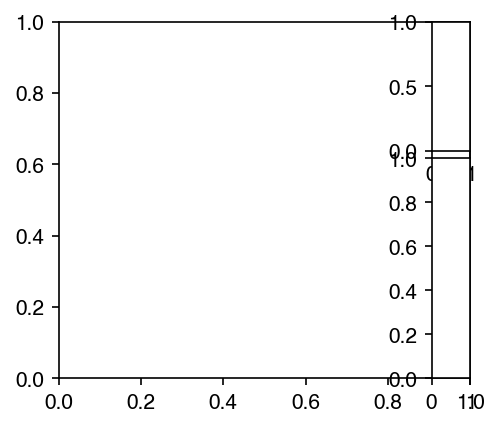

In [262]:
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Helvetica"

cm = 1/2.54
fig=plt.figure(figsize=(9*cm, 8*cm), dpi=150, facecolor='white')
gs = GridSpec(8, 9, figure=fig)
axs= [None]*3

axs[0] = fig.add_subplot(gs[0:8,0:9])
axs[1] = fig.add_subplot(gs[0:3,8])
axs[2] = fig.add_subplot(gs[3:8,8])

In [243]:
print(rd_cor.min(), rd_cor.max())
print(th_cor.min(), th_cor.max())

0.896 1.0
0.429 1.0


In [244]:
y = np.broadcast_to(np.arange(1,7).reshape(1,6), (6,6))
x = np.transpose(y)

import matplotlib.colors as color

cm_upp = 0.7
cm_low = 0.2

cb_upp = 1.0
cb_low = 0.8

cols_cb   = plt.cm.Reds(np.linspace(cm_low, cm_upp, 255))
cols_real = plt.cm.Reds(np.linspace(cm_low + (cm_upp - cm_low) * (rd_cor.min() - cb_low), cm_upp - (cm_upp - cm_low) * (cb_upp - rd_cor.max()), 255))  
real_mapping = color.LinearSegmentedColormap.from_list('my_colormap1', cols_real)
cb_mapping   = color.LinearSegmentedColormap.from_list('my_colormap1', cols_cb) 

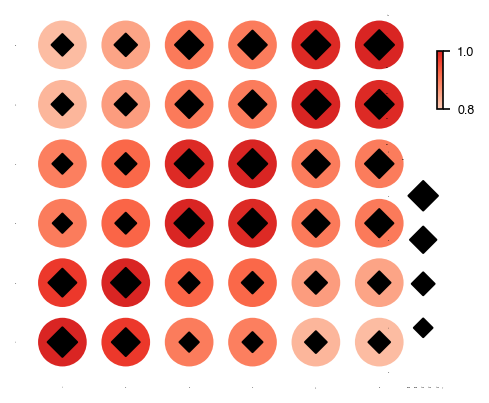

<Figure size 432x288 with 0 Axes>

In [263]:
axs[0].scatter(x.flatten(), y.flatten(), c=rd_cor.flatten(), cmap=real_mapping, s=500)
axs[0].scatter(x.flatten(), y.flatten(), c='k', s=th_cor.flatten()*100, marker='D')
axs[0].set_ylim(0.5,6.5)
axs[0].set_xlim(0.5,7)
axs[2].scatter(np.ones(4), np.arange(1,5), c='k', s=np.array([.4,.6,.8,1])*100, marker='D')
axs[2].set_ylim([0, 5])

for i in range(3):
    axs[i].tick_params(axis='x', which='major', width=0, labelsize=0)
    axs[i].tick_params(axis='y', which='major', width=0, labelsize=0)
    for pos in ['top', 'bottom', 'left', 'right']:
            axs[i].spines[pos].set_visible(False)

cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap=cb_mapping), ax=axs[1], location='right', drawedges=False, aspect=10, 
             orientation='vertical', label='', shrink=2, anchor=(-10,0.5), ticks=[0,1])
cb.ax.set_yticklabels(labels=[str(0.8), str(1.0)], fontdict={'fontsize':6})


plt.tight_layout(w_pad=5)
fig

In [264]:
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f04/retest.pdf')